### Importamos las librerías que vamos a utilizar

In [4]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
%matplotlib inline

### Importamos el DataSet de Properatti

In [5]:
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.max_rows', 900000)
path = 'properatti.csv'
data = pd.read_csv(path,sep=',')

# Planificación de las notebook
El **Objetivo** de esta notebook, es **analizar** especialmente la **concentración de valores nulos y valores no nulos** de las columnas que consideramos indispensables para el dataset. Ademas dependiendo la importancia de dicha columna el análsis puede ser mas extenso, en otras palabras, ver la concetración de sus datos por diferetes criterios. Analizar donde hay mayor concetración de valores no nulos y nulos por zona y por propiedad. En el caso de los **valores no nulos** analizar sus mínimos, máximos y medias con el objetivo de empezar a tener mayor conocimiento de los datos que nos vamos encontrando para luego poder tomar las decisiones correctas a la hora de realizar la limpieza.

**INDEX**

- **UNNAMED: 0** : indica del dataset, con lo cual nos vamos a quedar con el índice por default de Pandas. La columna tiene el **100% de valores**.
**UBICACIÓN**
- **COUNTRY_NAME** : contiene el país donde está situado el inmueble, son todos en argentina. La columna tiene el **100% de valores**.
- **STATE_NAME** : contiene la provincia donde está situado el inmueble. La columna tiene el **100% de valores**.
- **PLACE_NAME** : Indica barrio/localidad donde se ubica el inmueble. La columna tieneel **100% de valores**.
- **PLACE_WITH_PARENT_NAMES** : esta columna engloba el país, la provincia el barrio y la zona donde esta y no tiene ningún nulo. Tiene el **100% de valores**.

 **GEOLOCALIZACION**
- **GEONAMES_ID** : contiene datos de geopandas, pero no lo vamos a utilizar.
- **LAT-LON** : contiene datos de latitud y longitud de la ubicación del inmueble
- **LAT** : Latitud (localización geográfica)
- **LON** : Longitud (localización geográfica)

**PRECIO**
- **PRICE** : Precio del inmueble. Tiene 100810 valores y 20410 de nulos (**porcentaje de nulos de 16,84%**)
- **PRICE_APROX_LOCAL_CURRENCY** : Precio del inmueble en pesos argentinos Tiene 100810 valores y 20410 de nulos (**porcentaje de nulos de 16,84%**)
- **PRICE_APROX_USD** : Precio del inmueble en dólares. Tiene 100810 valores completos y 20410 de nulos (**porcentaje de nulos de 16,84%**)

**SUPERFICIE**
-  **SURFACE_TOTAL_IN_M2** : Superficie total (cubierta y descubierta) en mts2. La misma tiene 81892 valores y 39328 (**porcentaje de nulos 32,44%**)
- **SURFACE_COVERED_IN_M** : Superficie cubierta en mts2. Tiene 101313 valores completos y 19907 nulos (porcentaje de nulos **16,42%**)

**PRECIO POR METRO CUADRADO**
- **PRICE_USD_PER_M2** : Precio por m2 en dólares (precio/sup total). Tiene 68617 valores completos y 52603 nulos (**porcentaje de nulos 43,39%**)
- **PRICE_PER_M2** : Precio por m2 (precio/sup cubierta). Tiene 87658 valores completos y 33562 nulos (**porcentaje de nulos 27,69%**)

**CARACTERISTICAS DE LOS INMUEBLES**
- **FLOOR** : Contiene la cantidad de plantas que tiene el inmueble
- **ROOMS** : indica la cantidad de habitaciones que tienen los inmuebles. Tiene 7899 valores completos y 113321 nulos (**porcentaje de nulos 93,48%**)
- **EXPENSES** : el valor de las expensas. Tiene 14262 valores completos y 106958 nulos( **porcentajes de nulos 88,23%**)

**INFO DE LOS INMUEBLES**
- **PROPERTY_TYPE** : Indica si el tipo de propiedad es una casa, un departamento, PH o un negocio. La columna tiene el **100% de valores**.
- **DESCRIPTION** : contiene información descriptiva de los inmuebles como ser habitaciones, precios, tipo de propiedad, amenities, etc. Tiene 121218 valores completos y solo dos nulos.
- **TITLE** : Contiene los títulos de las publicaciones del inmueble y contiene el **100% de los valores**.
- **IMAGE_THUMBNAIL** : Tiene las imágenes de la publicación de venta. Tiene 118108 valores completos y 3112 nulos ( **porcentaje de nulos de 2,57%**)
- **OPERATION** : indica que la propiedad esta en venta y todos los valores son SELL por esa razón no tiene ninguna utilidad. La columna tiene el **100% de valores**.
- **PROPERATI_URL** : Tiene la dirección URL de la publicación de los inmuebles.

## Análisis Inicial
A partir de ahora en adelante desarollaremos el analisis inicial

In [6]:
print('Total de Filas: ',data.shape[0])
print('Total de Columnas: ',data.shape[1])

Total de Filas:  121220
Total de Columnas:  26


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  121220 non-null  int64  
 1   operation                   121220 non-null  object 
 2   property_type               121220 non-null  object 
 3   place_name                  121197 non-null  object 
 4   place_with_parent_names     121220 non-null  object 
 5   country_name                121220 non-null  object 
 6   state_name                  121220 non-null  object 
 7   geonames_id                 102503 non-null  float64
 8   lat-lon                     69670 non-null   object 
 9   lat                         69670 non-null   float64
 10  lon                         69670 non-null   float64
 11  price                       100810 non-null  float64
 12  currency                    100809 non-null  object 
 13  price_aprox_lo

In [8]:
data.isnull().sum().sort_values(ascending=False)

floor                         113321
expenses                      106958
rooms                          73830
price_usd_per_m2               52603
lon                            51550
lat-lon                        51550
lat                            51550
surface_total_in_m2            39328
price_per_m2                   33562
currency                       20411
price_aprox_usd                20410
price_aprox_local_currency     20410
price                          20410
surface_covered_in_m2          19907
geonames_id                    18717
image_thumbnail                 3112
place_name                        23
description                        2
title                              0
properati_url                      0
state_name                         0
country_name                       0
place_with_parent_names            0
property_type                      0
operation                          0
Unnamed: 0                         0
dtype: int64

In [9]:
round((data.isnull().sum().sort_values(ascending=False)/data.shape[0])*100,2).sort_values(ascending=False)

floor                         93.48
expenses                      88.23
rooms                         60.91
price_usd_per_m2              43.39
lon                           42.53
lat-lon                       42.53
lat                           42.53
surface_total_in_m2           32.44
price_per_m2                  27.69
price_aprox_local_currency    16.84
currency                      16.84
price_aprox_usd               16.84
price                         16.84
surface_covered_in_m2         16.42
geonames_id                   15.44
image_thumbnail                2.57
place_name                     0.02
operation                      0.00
description                    0.00
title                          0.00
properati_url                  0.00
state_name                     0.00
country_name                   0.00
place_with_parent_names        0.00
property_type                  0.00
Unnamed: 0                     0.00
dtype: float64

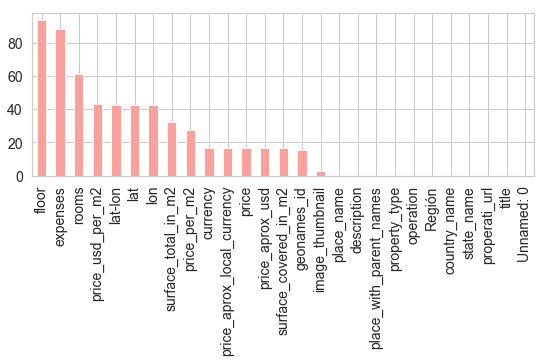

In [130]:
porcentaje=(data.isnull().sum()/data.shape[0])*100
porcentaje=porcentaje.sort_values(ascending=False)
plt.figure(figsize=(9, 3))
porcentaje.plot(kind="bar", fontsize=14, color="r");

# Columna: 'property_type'

Observamos a simple vista una importante predominancia de departamentos, seguido de casas.
La baja proporción tanto de PHs como de stores nos da a entender que difícilmente podramos en los desafíos por venir armar un modelo que logre explicar o predecir valores para estos tipos de propiedad.


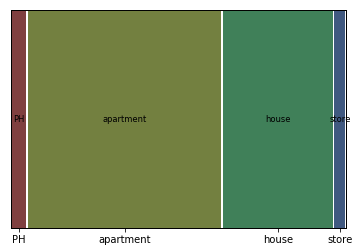

In [10]:
mosaic(data,["property_type"]);

In [11]:
data.groupby('property_type').size().sort_values(ascending=False)

property_type
apartment    71065
house        40268
PH            5751
store         4136
dtype: int64

In [12]:
print(round((data.property_type.value_counts()/data.shape[0])*100,2))

apartment    58.62
house        33.22
PH            4.74
store         3.41
Name: property_type, dtype: float64


En base al análisis de arriba, El **92%** de los datos se **concentra entre apartment y house**.

**Agrupamos** todos los datos por provincia y tipo de propiedad 

In [13]:
data.groupby(['state_name','property_type']).size()

state_name                property_type
Bs.As. G.B.A. Zona Norte  PH                 985
                          apartment        10622
                          house            13364
                          store              589
Bs.As. G.B.A. Zona Oeste  PH                 789
                                           ...  
Tierra Del Fuego          store                3
Tucumán                   PH                   4
                          apartment          425
                          house              214
                          store               31
Length: 98, dtype: int64

Agrupando por Provincia y tipo de propiedad y luego quedándonos con los registros de mayor frecuencia, vemos a priori que lo más representativo dentro de la muestra son los departamentos en CABA, con una importante presencia.

In [14]:
#Vemos donde se concetran la mayor parte de estos valores por prov y tipo de propiedad
data.groupby(['state_name','property_type']).size().sort_values(ascending=False).head(10)

state_name                    property_type
Capital Federal               apartment        27037
Bs.As. G.B.A. Zona Norte      house            13364
                              apartment        10622
Santa Fe                      apartment         7969
Bs.As. G.B.A. Zona Sur        house             6985
Córdoba                       apartment         6681
Buenos Aires Costa Atlántica  apartment         6461
Bs.As. G.B.A. Zona Sur        apartment         5507
Bs.As. G.B.A. Zona Oeste      house             4663
Córdoba                       house             4521
dtype: int64

Al mismo tiempo, vemos que hay combinaciones de tipo de propiedad y provincia muy poco representativas.
Pese a esta poca ocurrencia, decidimos no tomar ninguna decisión. Creemos prudente no eliminar información sensible antes de terminar de analizar el dataframe.

In [15]:
#Vemos donde se concetran la menor parte de estos valores por prov y tipo de propiedad
data.groupby(['state_name','property_type']).size().sort_values(ascending=False).tail(10)

state_name           property_type
Santiago Del Estero  house            3
La Rioja             apartment        2
San Luis             PH               2
Salta                store            2
La Rioja             house            2
Santa Cruz           store            1
Santiago Del Estero  apartment        1
Santa Cruz           apartment        1
Jujuy                store            1
San Juan             store            1
dtype: int64

# Columna 'surface_total_in_m2'

**Descripción General** 

Dentro del total de la base de observaciones, existen algunas variables (fundamentalmente de carácter numérico) que requieren especial atención debido a la presencia de valores extremos u outliers, es decir, observaciones que se alejan considerablemente de las principales medidas de tendencia central para esa variable.

En particular, en este apartado nos centraremos en el análisis de valores extremos para la variable “surface_total_in_m2”.

Con casi 40.000 valores nulos, vemos una media de 233m2, valor sobre el cual no podemos sacar muchas conclusiones debido a la heterogeneidad tanto en términos geográficos como por tipo de propiedad. Justamente debido a esto nos encontramos con una dispersión notable.

In [17]:
data.surface_total_in_m2.describe()

count     81892.000000
mean        233.795328
std        1782.222147
min           0.000000
25%          50.000000
50%          84.000000
75%         200.000000
max      200000.000000
Name: surface_total_in_m2, dtype: float64

In [18]:
print('Total de nulos: ',data.surface_total_in_m2.isnull().sum())
print('Total de no nulos: ',data.surface_total_in_m2.notnull().sum())
print("")
print('Porcenatje de nulos: ',(((data.surface_total_in_m2.isnull().sum()/data.shape[0])*100)).round(2))
print('Porcentaje de no nulos: ',(((data.surface_total_in_m2.notnull().sum()/data.shape[0])*100)).round(2))

Total de nulos:  39328
Total de no nulos:  81892

Porcenatje de nulos:  32.44
Porcentaje de no nulos:  67.56


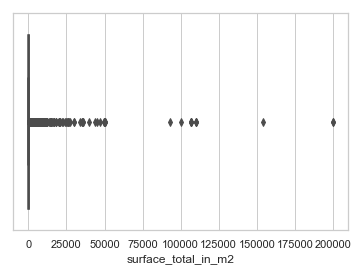

In [19]:
sns.set(style="whitegrid")
sns.boxplot(data["surface_total_in_m2"]);

El gráfico anterior nos muestra en un primer pantallazo la presencia de valores extremos cuya autenticidad no estamos seguros. 
No obstante, esto no logra apreciarse lo suficiente si no hacemos un análisis teniendo en cuenta el tipo de propiedad.
Cuando hacemos esto (gráfico debajo), vemos que los valores más altos para superficie total provienen de la categoría apartamentos. En este caso, sí podemos estar seguros que no hay posibilidades de que un departamento supere cierto umbral (más adelante veremos que tomamos como valor umbral los 600mts, y reemplazamos con NaN todos los departamentos donde la superficie sea mayor a este valor).

Paralelamente, no creemos acertado hacer el mismo supuesto para la categoría casas, ya que viendo la descripción de forma manual para estos registros notamos que en general los valores más extremos corresponden a fincas, o terrenos grandes para importantes desarrollos inmobiliarios. Es por esto que no tomaremos ninguna medida para con ellos.

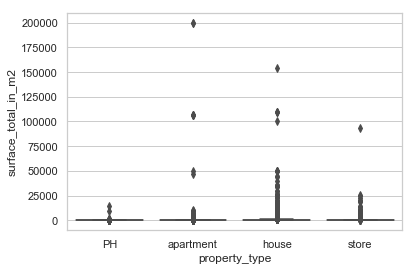

In [20]:
sns.boxplot(x='property_type',y="surface_total_in_m2",data=data)

## Concetración de valores completos
 Generamos una mascara boleana para quedarnos con los valores no nulos de dicha columna para luego crear un nuevo DataFrame poder realizar diferentes tipos de analisis.

In [25]:
#Generamos una mascara
m2_total_no_nulos_mascara = data.surface_total_in_m2.notnull()

#Creamos el data Frame
m2_total_no_nulos = data.loc[m2_total_no_nulos_mascara,:]

En la siguiente tabla pivot, podemos obtener algunas conclusiones iniciales:

Deberemos prestar especial atención a la presencia de valores outliers tanto mínimos como máximos.
No es posible que una propiedad - independientemente su tipo - tenga 0m2 de superficie, así como tampoco que un departamento tenga 200.000m2.

Los valores de media llaman la atención especialmente para la variable store. No parece razonable que la media sea incluso menor a la de casas.

La dispersión evidentemente es muy alta, esto puede entenderse para algunos tipos de propiedad (es lógico quizás que difiera mucho la superficie de un store a otro o incluso de una casa a otra, pero en departamentos no tiene sentido).

In [26]:
#Agrupamos por tipo de propiedad
m2_total_no_nulos.groupby('property_type').size().sort_values(ascending=False)
#Agrupamos por Provincia (min, max, promedio, cantidad y su porcentaje en base a los no nulos)
m2_total_no_nulos_pvt = m2_total_no_nulos.pivot_table(values='surface_total_in_m2',index='property_type',aggfunc=['min','max','mean',np.std,'count']).round(2)
m2_total_no_nulos_pvt['Porcentaje'] = (((m2_total_no_nulos_pvt[('count', 'surface_total_in_m2')] / m2_total_no_nulos.shape[0])*100).round(2))
m2_total_no_nulos_pvt.sort_values(by='Porcentaje',ascending=False)

,min,max,mean,std,count,Porcentaje
,surface_total_in_m2,surface_total_in_m2,surface_total_in_m2,surface_total_in_m2,surface_total_in_m2,
property_type,,,,,,
apartment,0.0,200000.0,96.61,1602.66,51085,62.38
house,0.0,154438.0,507.44,2135.55,24505,29.92
PH,0.0,14742.0,122.30,298.39,3601,4.40
store,0.0,93000.0,494.51,2261.12,2701,3.30


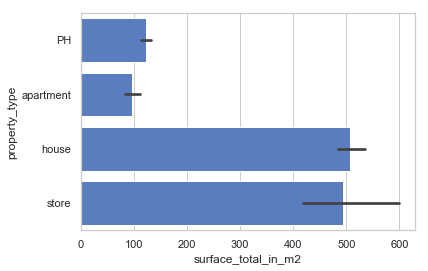

In [33]:
#Promedio m2_total por tipo de propiedad
sns.set_color_codes("muted")
sns.barplot(x="surface_total_in_m2", y="property_type", data=m2_total_no_nulos,
            label="surface_total_in_m2", color="b")

In [27]:
#Agrupamos por Provincia (cant y su porcentaje en base a los no nulos)
m2_total_pvt = m2_total_no_nulos.pivot_table(values='surface_total_in_m2',index='state_name',aggfunc=['min','max','mean',np.std,'count']).round(2)
m2_total_pvt['Porcentaje'] = (((m2_total_pvt[('count', 'surface_total_in_m2')] / m2_total_no_nulos.shape[0])*100).round(2))
m2_total_pvt.sort_values(by='Porcentaje',ascending=False)

,min,max,mean,std,count,Porcentaje
,surface_total_in_m2,surface_total_in_m2,surface_total_in_m2,surface_total_in_m2,surface_total_in_m2,
Capital Federal,0.0,200000.0,119.22,1248.22,26437,32.28
Bs.As. G.B.A. Zona Norte,0.0,45000.0,313.95,914.29,18757,22.90
Bs.As. G.B.A. Zona Sur,11.0,93000.0,230.56,1203.33,7109,8.68
Buenos Aires Costa Atlántica,0.0,50000.0,213.72,976.05,6985,8.53
Santa Fe,0.0,200000.0,144.94,2490.52,6883,8.40
Bs.As. G.B.A. Zona Oeste,0.0,50000.0,263.22,854.32,6055,7.39
Córdoba,0.0,110000.0,406.52,4111.55,5044,6.16
Buenos Aires Interior,0.0,154438.0,933.36,5825.06,1360,1.66
Tucumán,14.0,1320.0,153.34,160.05,514,0.63


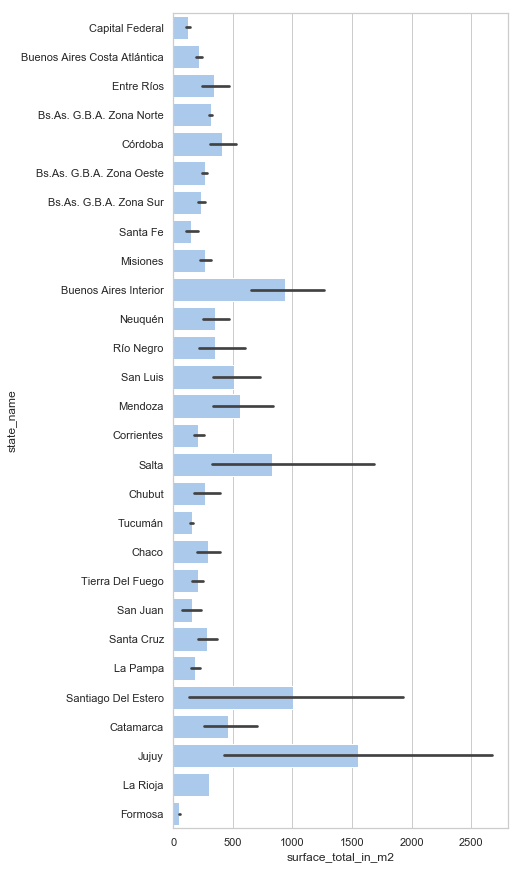

In [29]:
#Promedio m2_total por provincia
f, ax = plt.subplots(figsize=(6, 15))
sns.set_color_codes("pastel")
sns.barplot(x="surface_total_in_m2", y="state_name", data=m2_total_no_nulos,
            label="surface_total_in_m2", color="b")

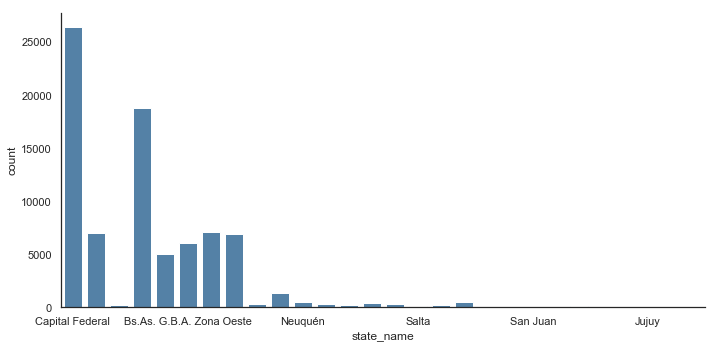

In [70]:
#Cantidad de no nulos por provincia
with sns.axes_style('white'):
    g = sns.catplot("state_name", data=m2_total_no_nulos, aspect=2, kind="count", color='steelblue')
    g.set_xticklabels(step=5)

In [26]:
#Agrupamos por tipo de propiedad y barrio (cant,min,max,prom) 
m2_total_no_nulos.pivot_table(values='surface_total_in_m2',index=['state_name','property_type'],aggfunc=['count','min','max',np.std,'mean']).round(2)

count  \
                                       surface_total_in_m2   
state_name               property_type                       
Bs.As. G.B.A. Zona Norte PH                            634   
                         apartment                    7905   
                         house                        9821   
                         store                         397   
Bs.As. G.B.A. Zona Oeste PH                            499   
...                                                    ...   
Tierra Del Fuego         store                           2   
Tucumán                  PH                              2   
                         apartment                     349   
                         house                         135   
                         store                          28   

                                                       min  \
                                       surface_total_in_m2   
state_name               property_type                       
Bs.As. G.B.A. Zona Norte PH                            0.0   
                         apartment                     0.0   
                         house                         0.0   
                         store                         0.0   
Bs.As. G.B.A. Zona Oeste PH                            0.0   
...                                                    ...   
Tierra Del Fuego         store                       280.0   
Tucumán                  PH                           97.0   
                         apartment                    14.0   
                         house                        75.0   
                         store                        26.0   

                                                       max  \
                                       surface_total_in_m2   
state_name               property_type                       
Bs.As. G.B.A. Zona Norte PH                          900.0   
                         apartment                  9563.0   
                         house                     45000.0   
                         store                     22355.0   
Bs.As. G.B.A. Zona Oeste PH                         1000.0   
...                                                    ...   
Tierra Del Fuego         store                       625.0   
Tucumán                  PH                          102.0   
                         apartment                   560.0   
                         house                      1320.0   
                         store                      1000.0   

                                                       std                mean  
                                       surface_total_in_m2 surface_total_in_m2  
state_name               property_type                                          
Bs.As. G.B.A. Zona Norte PH                          73.45              113.74  
                         apartment                  159.03               86.99  
                         house                     1141.88              492.58  
                         store                     2164.29              734.09  
Bs.As. G.B.A. Zona Oeste PH                          87.33              113.90  
...                                                    ...                 ...  
Tierra Del Fuego         store                      243.95              452.50  
Tucumán                  PH                           3.54               99.50  
                         apartment                   53.51               92.05  
                         house                      207.54              285.19  
                         store                      286.70              285.50  

[92 rows x 5 columns]

## Concentracion de nulos
Realizamos la misma metodologia que para el caso de valores no nulos.
Nos interesa saber de qué tipo de propiedad son y de qué provincias, debido a que posteriormente deberemos decidir entre imputar o eliminar los valores nulos, y en ambos casos debemos considerar que los nulos no se concentren en alguna categoría en especial, lo que haría que la imputación/eliminación contenga intrínsecamente un sesgo hacia alguna variable en particular, alterando las medidas de tendencia central del DataFrame.

In [36]:
#Generemos la mascara de nulos
mascara_nulos = data.surface_total_in_m2.isnull()

#Creamos un DF con los valores nulos de
m2_total_nulos = data.loc[mascara_nulos,:]

In [37]:
m2_total_nulos.isnull().sum().sort_values(ascending=False)

price_usd_per_m2              39328
surface_total_in_m2           39328
expenses                      36886
floor                         35219
rooms                         21736
lon                           16358
lat-lon                       16358
lat                           16358
price_per_m2                  15020
surface_covered_in_m2         12369
currency                       7385
price_aprox_usd                7384
price_aprox_local_currency     7384
price                          7384
geonames_id                    5499
image_thumbnail                1602
place_name                        5
description                       2
title                             0
properati_url                     0
state_name                        0
country_name                      0
place_with_parent_names           0
property_type                     0
operation                         0
Unnamed: 0                        0
dtype: int64

Si hacemos un analsis mas detallado nos podemos dar cuenta que para cada valor nulo en '**surface_total_in_m2**' tambien hay valor nulo en '**price_usd_per_m2**'

In [38]:
m2_total_nulos.loc[:,['surface_total_in_m2','price_usd_per_m2']].isnull().sum()

surface_total_in_m2    39328
price_usd_per_m2       39328
dtype: int64

In [39]:
m2_total_nulos.loc[:,['surface_total_in_m2','price_usd_per_m2']].notnull().sum()

surface_total_in_m2    0
price_usd_per_m2       0
dtype: int64

In [40]:
#agrupamos por tipo de propiedad
m2_total_nulos.groupby('property_type').size().sort_values(ascending=False)

property_type
apartment    19980
house        15763
PH            2150
store         1435
dtype: int64

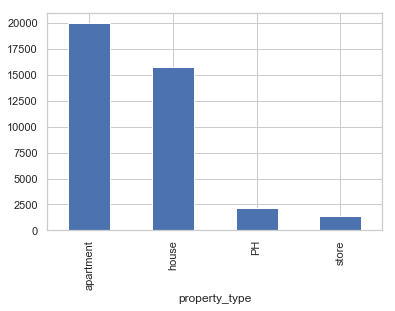

In [44]:
pivot_visual_prop_type= m2_total_nulos.groupby('property_type').size().sort_values(ascending=False)
pivot_visual_prop_type.plot(kind="bar")

In [32]:
#Creamos una pivot_table Por prov (cantidad y porcentaje en base al total de nulos)
nulos_sup_totales = m2_total_nulos.pivot_table(values='operation',index=['state_name'],aggfunc=['count'])
nulos_sup_totales['Porcentaje'] = (((nulos_sup_totales[('count', 'operation')] / m2_total_nulos.shape[0])*100).round(2))
nulos_sup_totales.sort_values(by='Porcentaje',ascending=False)

,count,Porcentaje
,operation,
state_name,,
Córdoba,7025,17.86
Bs.As. G.B.A. Zona Sur,6843,17.40
Bs.As. G.B.A. Zona Norte,6803,17.30
Capital Federal,5879,14.95
Santa Fe,3289,8.36
Bs.As. G.B.A. Zona Oeste,3267,8.31
Buenos Aires Costa Atlántica,3021,7.68
Buenos Aires Interior,931,2.37


<Figure size 720x720 with 0 Axes>

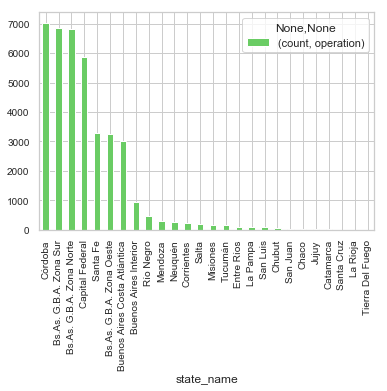

In [47]:
pivot_visual_prov = m2_total_nulos.pivot_table(values='operation',index=['state_name'],aggfunc=['count']).sort_values(by=[('count','operation')], ascending=False)
plt.figure(figsize=(10,10))
pivot_visual_prov.plot(kind="bar", color="g",fontsize=10,);

In [33]:
#Creamos una pivot_table Por tipo de propiedad y prov (cantidad y porcentaje en base al total de nulos)
nulos_sup_totales = m2_total_nulos.pivot_table(values='operation',index=['state_name','property_type'],aggfunc=['count'])
nulos_sup_totales['Porcentaje'] = (((nulos_sup_totales[('count', 'operation')] / m2_total_nulos.shape[0])*100).round(2))
nulos_sup_totales.sort_values(by='Porcentaje',ascending=False).head(10)

,,count,Porcentaje
,,operation,
state_name,property_type,,
Capital Federal,apartment,4457,11.33
Bs.As. G.B.A. Zona Sur,house,3878,9.86
Córdoba,apartment,3597,9.15
Bs.As. G.B.A. Zona Norte,house,3543,9.01
Córdoba,house,3067,7.80
Bs.As. G.B.A. Zona Norte,apartment,2717,6.91
Bs.As. G.B.A. Zona Sur,apartment,2160,5.49
Santa Fe,apartment,2137,5.43


In [34]:
nulos_sup_totales.sort_values(by='Porcentaje',ascending=False).tail(10)

,,count,Porcentaje
,,operation,
state_name,property_type,,
Misiones,PH,4,0.01
Tucumán,store,3,0.01
San Juan,store,1,0.00
Jujuy,store,1,0.00
Santa Cruz,apartment,1,0.00
Salta,store,1,0.00
Entre Ríos,PH,1,0.00
Chaco,store,1,0.00


# Columna 'surface_covered_in_m2'

Las conclusiones iniciales viendo el método "describe" son similares a la superficie total, aunque acá vemos una dispersión menor que en cierto sentido parece lógica porque acá al contar solo con superficie cubierta es de esperarse una menor variablidad entre las observaciones.

In [35]:
data.surface_covered_in_m2.describe().round(2)

count    101313.00
mean        133.05
std         724.35
min           0.00
25%          45.00
50%          75.00
75%         150.00
max      187000.00
Name: surface_covered_in_m2, dtype: float64

In [36]:
print('Total de nulos: ',data.surface_covered_in_m2.isnull().sum())
print('Total de no nulos: ',data.surface_covered_in_m2.notnull().sum())
print("")
print('Porcenatje de nulos: ',(((data.surface_covered_in_m2.isnull().sum()/data.shape[0])*100)).round(2))
print('Porcentaje de no nulos: ',(((data.surface_covered_in_m2.notnull().sum()/data.shape[0])*100)).round(2))

Total de nulos:  19907
Total de no nulos:  101313

Porcenatje de nulos:  16.42
Porcentaje de no nulos:  83.58


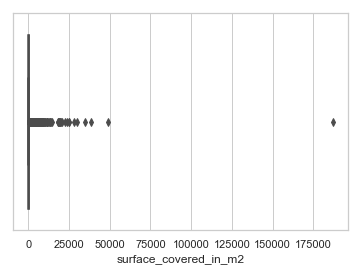

In [37]:
sns.set(style="whitegrid")
sns.boxplot(data["surface_covered_in_m2"]);

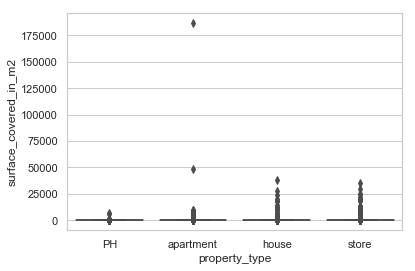

In [38]:
sns.boxplot(x='property_type',y="surface_covered_in_m2",data=data)

## Concentracion de valores completos

In [49]:
#Generamos una mascara booleana
mascara_no_nulos = data.surface_covered_in_m2.notnull()

#Creamos el dataFrame con los valores no nulos
m2_covered_no_nulos = data.loc[mascara_no_nulos,:]

In [50]:
#Analisis de cantidad, maximos, minimos y promedio por tipo de propiedad
pvt_m2_no_nulos_property = m2_covered_no_nulos.pivot_table(values='surface_covered_in_m2',index='property_type',aggfunc=['min','max','mean',np.std,'count']).round(2).sort_values(by=('count','surface_covered_in_m2'),ascending=False)
pvt_m2_no_nulos_property['Porcentaje'] = (((pvt_m2_no_nulos_property[('count', 'surface_covered_in_m2')] / m2_covered_no_nulos.shape[0])*100).round(2))
pvt_m2_no_nulos_property.sort_values(by='Porcentaje',ascending=False)

,min,max,mean,std,count,Porcentaje
,surface_covered_in_m2,surface_covered_in_m2,surface_covered_in_m2,surface_covered_in_m2,surface_covered_in_m2,
property_type,,,,,,
apartment,0.0,187000.0,74.04,805.14,59735,58.96
house,1.0,38240.0,217.84,420.28,33510,33.08
PH,1.0,6610.0,87.66,138.84,4913,4.85
store,1.0,35000.0,420.39,1562.61,3155,3.11


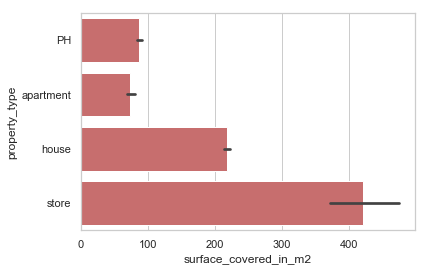

In [51]:
sns.set_color_codes("muted")
sns.barplot(x="surface_covered_in_m2", y="property_type", data=m2_covered_no_nulos,
            label="surface_covered_in_m2", color="r")

In [41]:
#Creamos una pivot_table Por prov (cantidad y porcentaje en base al total de no nulos)
pvt_m2_cubiertos_no_nulos = m2_covered_no_nulos.pivot_table(values='surface_covered_in_m2',index=['state_name'],aggfunc=['min','max','mean',np.std,'count']).round(2)

#Agregamos una columna para insetar los porcenatjes
pvt_m2_cubiertos_no_nulos['Porcentaje'] = (((pvt_m2_cubiertos_no_nulos[('count', 'surface_covered_in_m2')] / m2_covered_no_nulos.shape[0])*100).round(2))
pvt_m2_cubiertos_no_nulos.sort_values(by='Porcentaje',ascending=False)

,min,max,mean,std,count,Porcentaje
,surface_covered_in_m2,surface_covered_in_m2,surface_covered_in_m2,surface_covered_in_m2,surface_covered_in_m2,
state_name,,,,,,
Capital Federal,0.0,187000.0,97.79,1096.67,29977,29.59
Bs.As. G.B.A. Zona Norte,1.0,38240.0,179.88,520.32,23788,23.48
Bs.As. G.B.A. Zona Sur,1.0,30000.0,149.39,494.72,10940,10.80
Córdoba,1.0,25000.0,149.16,386.01,8607,8.50
Bs.As. G.B.A. Zona Oeste,1.0,25186.0,129.84,464.59,7940,7.84
Buenos Aires Costa Atlántica,1.0,49000.0,117.85,617.21,7535,7.44
Santa Fe,1.0,11111.0,80.30,220.89,7377,7.28
Buenos Aires Interior,1.0,27853.0,163.40,685.79,1780,1.76


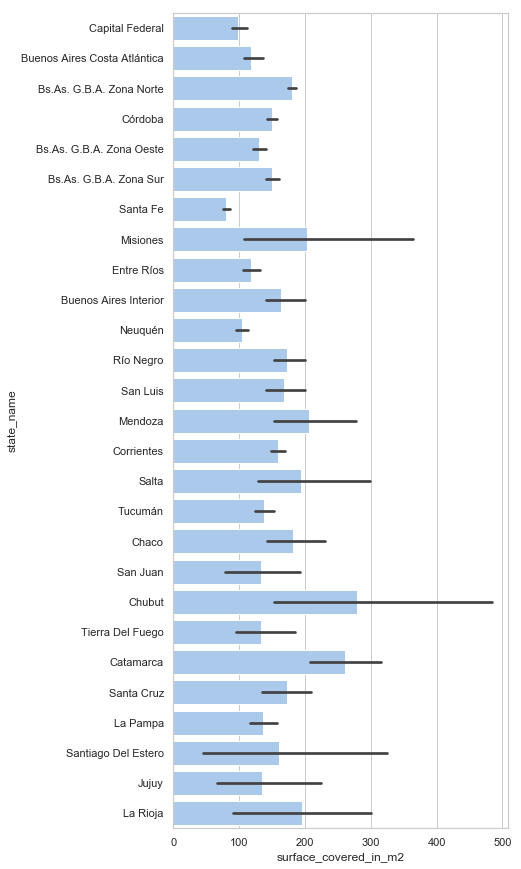

In [53]:
#Promedio de m2_covered por provincia
f, ax = plt.subplots(figsize=(6, 15))
sns.set_color_codes("pastel")
sns.barplot(x="surface_covered_in_m2", y="state_name", data=m2_covered_no_nulos,
            label="surface_covered_in_m2", color="b")

In [42]:
#Analisis de cantidad, maximos, minimos y promedio y desvio standard por  prov y tipo de propiedad
m2_covered_no_nulos.pivot_table(values='surface_covered_in_m2',index=['state_name','property_type'],aggfunc=['count','min','max','mean',np.std]).round(2).sort_values(by=('count','surface_covered_in_m2'),ascending=False).head(10)

count  \
                                           surface_covered_in_m2   
state_name                   property_type                         
Capital Federal              apartment                     25240   
Bs.As. G.B.A. Zona Norte     house                         12533   
                             apartment                      9839   
Santa Fe                     apartment                      6041   
Bs.As. G.B.A. Zona Sur       house                          5348   
Buenos Aires Costa Atlántica apartment                      4772   
Bs.As. G.B.A. Zona Sur       apartment                      4554   
Córdoba                      apartment                      4162   
Bs.As. G.B.A. Zona Oeste     house                          4000   
Córdoba                      house                          3730   

                                                             min  \
                                           surface_covered_in_m2   
state_name                   property_type                         
Capital Federal              apartment                       0.0   
Bs.As. G.B.A. Zona Norte     house                           1.0   
                             apartment                       1.0   
Santa Fe                     apartment                      17.0   
Bs.As. G.B.A. Zona Sur       house                           1.0   
Buenos Aires Costa Atlántica apartment                       1.0   
Bs.As. G.B.A. Zona Sur       apartment                       1.0   
Córdoba                      apartment                       1.0   
Bs.As. G.B.A. Zona Oeste     house                           1.0   
Córdoba                      house                           1.0   

                                                             max  \
                                           surface_covered_in_m2   
state_name                   property_type                         
Capital Federal              apartment                  187000.0   
Bs.As. G.B.A. Zona Norte     house                       38240.0   
                             apartment                   10145.0   
Santa Fe                     apartment                    6674.0   
Bs.As. G.B.A. Zona Sur       house                       18153.0   
Buenos Aires Costa Atlántica apartment                   49000.0   
Bs.As. G.B.A. Zona Sur       apartment                    8225.0   
Córdoba                      apartment                    7500.0   
Bs.As. G.B.A. Zona Oeste     house                       20383.0   
Córdoba                      house                       12731.0   

                                                            mean  \
                                           surface_covered_in_m2   
state_name                   property_type                         
Capital Federal              apartment                     79.35   
Bs.As. G.B.A. Zona Norte     house                        247.84   
                             apartment                     74.61   
Santa Fe                     apartment                     60.63   
Bs.As. G.B.A. Zona Sur       house                        196.38   
Buenos Aires Costa Atlántica apartment                     75.22   
Bs.As. G.B.A. Zona Sur       apartment                     67.30   
Córdoba                      apartment                     71.23   
Bs.As. G.B.A. Zona Oeste     house                        174.51   
Córdoba                      house                        216.36   

                                                             std  
                                           surface_covered_in_m2  
state_name                   property_type                        
Capital Federal              apartment                   1183.33  
Bs.As. G.B.A. Zona Norte     house                        476.99  
                             apartment                    149.51  
Santa Fe                     apartment                    109.38  
Bs.As. G.B.A. Zona Sur       house                

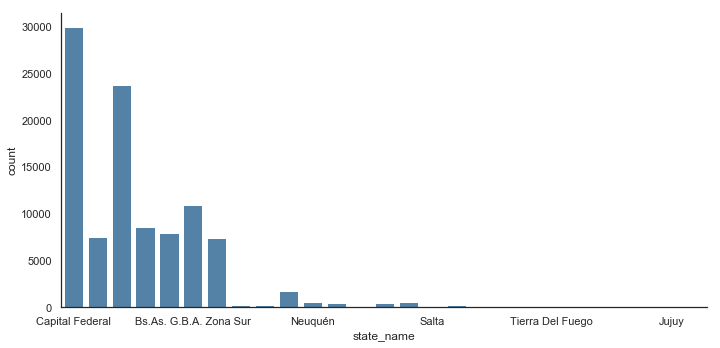

In [62]:
with sns.axes_style('white'):
    g = sns.catplot("state_name", data=m2_covered_no_nulos, aspect=2, kind="count", color='steelblue')
    g.set_xticklabels(step=5)

## Concentracion de Nulos

De la misma forma que analizamos los nulos para superficie total, los vemos para superficie cubierta. La idea es que cuando tengamos que proceder a eliminar o imputar estos valores nulos, seamos conscientes de los efectos que podemos generar en el data frame.

In [55]:
#Generamos mascara de nulos
mascara_nulos = data.surface_covered_in_m2.isnull()

#Creamos DF con los valores nulos
m2_covered_nulos = data.loc[mascara_nulos,:]

In [56]:
m2_covered_nulos.isnull().sum().sort_values(ascending=False)

price_per_m2                  19907
surface_covered_in_m2         19907
floor                         19051
expenses                      18588
price_usd_per_m2              14642
rooms                         13846
surface_total_in_m2           12369
lon                            7997
lat-lon                        7997
lat                            7997
currency                       6758
price_aprox_usd                6757
price_aprox_local_currency     6757
price                          6757
geonames_id                    2053
image_thumbnail                1000
description                       1
title                             0
properati_url                     0
state_name                        0
country_name                      0
place_with_parent_names           0
place_name                        0
property_type                     0
operation                         0
Unnamed: 0                        0
dtype: int64

Al igual que ocurre en la columna **surface_total_in_m2** con **price_usd_per_m2**, aca ocurre lo mismo con '**price_per_m2**'. Para cada valor nulo de **surface_covered_in_m2** existe un valor nulo en **price_poer_m2** 

In [57]:
m2_covered_nulos.loc[:,['surface_covered_in_m2','price_per_m2']].isnull().sum()

surface_covered_in_m2    19907
price_per_m2             19907
dtype: int64

In [58]:
m2_covered_nulos.loc[:,['surface_covered_in_m2','price_per_m2']].notnull().sum()

surface_covered_in_m2    0
price_per_m2             0
dtype: int64

In [61]:
#Agrupamos nulos por tipo de propiedad
pivot_visual_prop_type_nulos = m2_covered_nulos.groupby('property_type')['operation'].size().sort_values(ascending=False)
pivot_visual_prop_type_nulos

property_type
apartment    11330
house         6758
store          981
PH             838
Name: operation, dtype: int64

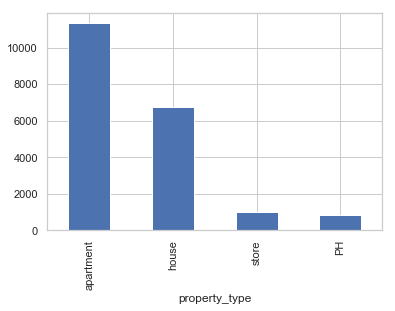

In [60]:
pivot_visual_prop_type_nulos.plot(kind="bar")

In [48]:
#Creamos una pivot_table Por prov (cantidad y porcentaje en base al total de nulos)
nulos_sup_covered = m2_covered_nulos.pivot_table(values='operation',index=['state_name'],aggfunc=['count'])
nulos_sup_covered['Porcentaje'] = (((nulos_sup_covered[('count', 'operation')] / m2_covered_nulos.shape[0])*100).round(2))
nulos_sup_covered.sort_values(by='Porcentaje',ascending=False)

,count,Porcentaje
,operation,
state_name,,
Córdoba,3462,17.39
Bs.As. G.B.A. Zona Sur,3012,15.13
Santa Fe,2795,14.04
Buenos Aires Costa Atlántica,2471,12.41
Capital Federal,2339,11.75
Bs.As. G.B.A. Zona Norte,1772,8.90
Bs.As. G.B.A. Zona Oeste,1382,6.94
Buenos Aires Interior,511,2.57


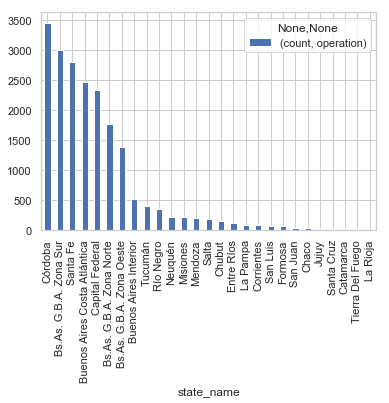

In [73]:
pivot_visual_prov_nulos = nulos_sup_covered = m2_covered_nulos.pivot_table(values='operation',index=['state_name'],aggfunc=['count']).sort_values(by=[('count','operation')],ascending=False)

pivot_visual_prov_nulos.plot(kind="bar")

In [49]:
#En  base a los nulos
nulos_sup_cubierta = m2_covered_nulos.pivot_table(values='operation',index=['state_name','property_type'],aggfunc=['count'])
nulos_sup_cubierta['Porcentaje'] = (((nulos_sup_cubierta[('count', 'operation')] / m2_covered_nulos.shape[0])*100).round(2))
nulos_sup_cubierta = nulos_sup_cubierta.sort_values(by=('count', 'operation'),ascending=False)
nulos_sup_cubierta.head(10)

count Porcentaje
                                           operation           
state_name                   property_type                     
Córdoba                      apartment          2519      12.65
Santa Fe                     apartment          1928       9.69
Capital Federal              apartment          1797       9.03
Buenos Aires Costa Atlántica apartment          1689       8.48
Bs.As. G.B.A. Zona Sur       house              1637       8.22
                             apartment           953       4.79
Bs.As. G.B.A. Zona Norte     house               831       4.17
Córdoba                      house               791       3.97
Bs.As. G.B.A. Zona Norte     apartment           783       3.93
Santa Fe                     house               769       3.86

In [50]:
nulos_sup_cubierta.tail(10)

,,count,Porcentaje
,,operation,
state_name,property_type,,
Neuquén,store,2,0.01
La Rioja,apartment,2,0.01
Tucumán,PH,2,0.01
San Luis,PH,2,0.01
Santa Cruz,apartment,1,0.01
Jujuy,store,1,0.01
Entre Ríos,PH,1,0.01
Tierra Del Fuego,store,1,0.01


# Análisis de ambas variables (m2_totales y m2_cubiertos) de manera conjunta 

## Nulos en ambas Columnas

In [75]:
mascara_nulos_m2 = data.surface_total_in_m2.isnull() & data.surface_covered_in_m2.isnull()
print('Porcentaje al DF original: ',((mascara_nulos_m2.sum()/data.shape[0])*100).round(2))
print('Total de valores nulos en ambas col: ',mascara_nulos_m2.sum())

Porcentaje al DF original:  10.2
Total de valores nulos en ambas col:  12369


In [76]:
data_m2_nulos  = data.loc[mascara_nulos_m2,['state_name','property_type','surface_total_in_m2','surface_covered_in_m2','operation']]

In [77]:
#Agrupamos nulos por tipo de propiedad
pivot_table_m2_nulos_property = data_m2_nulos.pivot_table(values='operation',index='property_type',aggfunc=['count'])
pivot_table_m2_nulos_property['Porcentaje'] = (((pivot_table_m2_nulos_property[('count', 'operation')]/data_m2_nulos.shape[0])*100).round(2))
pivot_table_m2_nulos_property.sort_values(by='Porcentaje',ascending=False)

,count,Porcentaje
,operation,
property_type,,
apartment,6301,50.94
house,4950,40.02
PH,597,4.83
store,521,4.21


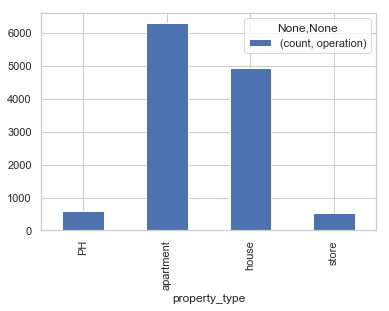

In [84]:
pivot_table_m2_nulos_property = data_m2_nulos.pivot_table(values='operation',index='property_type',aggfunc=['count'])
pivot_table_m2_nulos_property.plot(kind="bar")

### Concentracion de nulos en apartment y house (ya que son el 90%)

In [78]:
#Generamos mascara xa Departamentos
mascara_nulos_depto = data_m2_nulos.property_type == 'apartment'

#Creamos dataFrame en base a esos valores
data_nulos_m2_depto = data_m2_nulos.loc[mascara_nulos_depto,:]
data_nulos_m2_depto.groupby('state_name').size().sort_values(ascending=False)

state_name
Córdoba                         1908
Santa Fe                         954
Buenos Aires Costa Atlántica     783
Bs.As. G.B.A. Zona Sur           696
Capital Federal                  529
Bs.As. G.B.A. Zona Norte         465
Bs.As. G.B.A. Zona Oeste         330
Buenos Aires Interior            154
Neuquén                           84
Río Negro                         76
Salta                             69
Tucumán                           61
Mendoza                           50
La Pampa                          26
Entre Ríos                        26
San Luis                          22
Misiones                          21
Corrientes                        10
San Juan                          10
Jujuy                              8
Chaco                              7
Chubut                             6
Tierra Del Fuego                   2
La Rioja                           2
Catamarca                          1
Santa Cruz                         1
dtype: int64

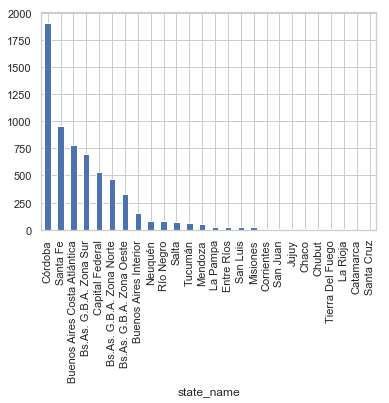

In [79]:
#En base a Deptos
pivot_visual_prov_depto_nulos = data_nulos_m2_depto.groupby('state_name').size().sort_values(ascending=False)
pivot_visual_prov_depto_nulos.plot(kind="bar")

In [81]:
#Generamos mascara xa casas
mascara_nulos_casa = data_m2_nulos.property_type == 'house'

#Creamos dataFrame en base a esos valores
data_nulos_m2_casa = data_m2_nulos.loc[mascara_nulos_casa,:]
data_nulos_m2_casa.groupby('state_name').size().sort_values(ascending=False)

state_name
Bs.As. G.B.A. Zona Sur          1352
Santa Fe                         692
Córdoba                          684
Bs.As. G.B.A. Zona Oeste         470
Bs.As. G.B.A. Zona Norte         360
Buenos Aires Costa Atlántica     344
Buenos Aires Interior            185
Capital Federal                  130
Mendoza                          115
Río Negro                        114
Salta                             89
Neuquén                           73
Misiones                          70
Tucumán                           54
Entre Ríos                        43
La Pampa                          40
Corrientes                        33
Chubut                            33
San Luis                          23
San Juan                          19
Chaco                             11
Jujuy                              7
Santa Cruz                         6
Catamarca                          3
dtype: int64

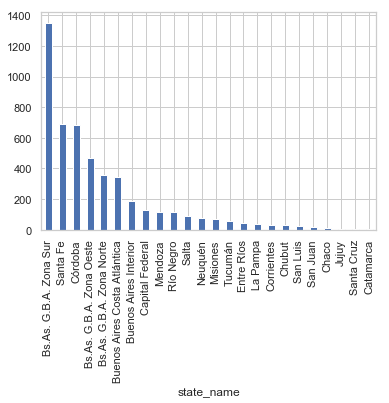

In [82]:
#En base a Casas
pivot_visual_prov_casa_nulos = data_nulos_m2_casa.groupby('state_name').size().sort_values(ascending=False)
pivot_visual_prov_casa_nulos.plot(kind="bar")

In [56]:
##Agrupamos nulos solo por provincia
pivot_table_m2_nulos = data_m2_nulos.pivot_table(values='operation',index='state_name',aggfunc=['count'])
pivot_table_m2_nulos.columns
pivot_table_m2_nulos['Porcentaje'] = (((pivot_table_m2_nulos[('count', 'operation')]/data_m2_nulos.shape[0])*100).round(2))
pivot_table_m2_nulos.sort_values(by='Porcentaje',ascending=False)

,count,Porcentaje
,operation,
state_name,,
Córdoba,2709,21.90
Bs.As. G.B.A. Zona Sur,2347,18.97
Santa Fe,1722,13.92
Buenos Aires Costa Atlántica,1267,10.24
Bs.As. G.B.A. Zona Oeste,955,7.72
Bs.As. G.B.A. Zona Norte,915,7.40
Capital Federal,786,6.35
Buenos Aires Interior,357,2.89


In [57]:
#Agrupamos nulos por ambas (propiedad y prov)
data_m2_nulos.pivot_table(values='operation',index=['state_name','property_type'],aggfunc=['count']).head(12)

count
                                       operation
state_name               property_type          
Bs.As. G.B.A. Zona Norte PH                   54
                         apartment           465
                         house               360
                         store                36
Bs.As. G.B.A. Zona Oeste PH                  116
                         apartment           330
                         house               470
                         store                39
Bs.As. G.B.A. Zona Sur   PH                  175
                         apartment           696
                         house              1352
                         store               124

## Valores no nulos y sus posibles casos (m2_total y m2_covered)

In [58]:
#Valores completos en ambas col
#Creamos la mascara
mascara_no_nulos_m2_totales_cubiertos = data.surface_total_in_m2.notnull() &  data.surface_covered_in_m2.notnull()
print('Porcentaje: ',((mascara_no_nulos_m2_totales_cubiertos.sum()/data.shape[0])*100).round(2))
print('Total de valores no nulos en ambas col: ',mascara_no_nulos_m2_totales_cubiertos.sum())

Porcentaje:  61.34
Total de valores no nulos en ambas col:  74354


In [59]:
#Valor completo solo en m2_total y no en m2_covered
mascara_no_nulos_m2_totales = data.surface_total_in_m2.notnull() &  data.surface_covered_in_m2.isnull()
print('Porcentaje: ',((mascara_no_nulos_m2_totales.sum()/data.shape[0])*100).round(2))
print('Total de filas: ',mascara_no_nulos_m2_totales.sum())

Porcentaje:  6.22
Total de filas:  7538


In [60]:
#Valor completo solo en m2_covered s y no en m2_total
mascara_no_nulos_m2_cubierto = data.surface_total_in_m2.isnull() &  data.surface_covered_in_m2.notnull()
print('Porcentaje: ',((mascara_no_nulos_m2_cubierto.sum()/data.shape[0])*100).round(2))
print('Total de Filas: ',mascara_no_nulos_m2_cubierto.sum())

Porcentaje:  22.24
Total de Filas:  26959


## Analicis inicial de los valores completos en ambas columnas

In [61]:
#Creamos dataFrame con los valores no nulos en ambas columnas
m2_cubiertos_totales_no_nulos = data.loc[mascara_no_nulos_m2_totales_cubiertos,:]
print(m2_cubiertos_totales_no_nulos.shape)
m2_cubiertos_totales_no_nulos.isnull().sum().sort_values(ascending=False)

(74354, 26)


floor                         70918
expenses                      63405
rooms                         46378
lat-lon                       31718
lat                           31718
lon                           31718
geonames_id                   12389
price_per_m2                  11004
currency                      11002
price                         11002
price_usd_per_m2              11002
price_aprox_usd               11002
price_aprox_local_currency    11002
image_thumbnail                1140
place_name                       18
title                             0
surface_total_in_m2               0
surface_covered_in_m2             0
properati_url                     0
description                       0
state_name                        0
country_name                      0
place_with_parent_names           0
property_type                     0
operation                         0
Unnamed: 0                        0
dtype: int64

In [63]:
m2_cubiertos_totales_no_nulos.groupby('property_type').size().sort_values(ascending=False)

property_type
apartment    46056
house        22697
PH            3360
store         2241
dtype: int64

In [64]:
m2_cubiertos_totales_no_nulos.groupby('state_name').size().sort_values(ascending=False)

state_name
Capital Federal                 24884
Bs.As. G.B.A. Zona Norte        17900
Bs.As. G.B.A. Zona Sur           6444
Santa Fe                         5810
Buenos Aires Costa Atlántica     5781
Bs.As. G.B.A. Zona Oeste         5628
Córdoba                          4291
Buenos Aires Interior            1206
Neuquén                           440
Mendoza                           346
Corrientes                        322
Tucumán                           246
Entre Ríos                        214
Río Negro                         210
Misiones                          186
San Luis                          151
Chubut                             74
Salta                              72
La Pampa                           66
Chaco                              27
Tierra Del Fuego                   26
Santa Cruz                          9
San Juan                            7
Catamarca                           5
Jujuy                               4
Santiago Del Estero                 4
L

In [65]:
m2_cubiertos_totales_no_nulos.pivot_table(values='surface_total_in_m2',index=['state_name','property_type'],aggfunc=['count']).head(12)

count
                                       surface_total_in_m2
state_name               property_type                    
Bs.As. G.B.A. Zona Norte PH                            612
                         apartment                    7587
                         house                        9350
                         store                         351
Bs.As. G.B.A. Zona Oeste PH                            474
                         apartment                    1855
                         house                        3163
                         store                         136
Bs.As. G.B.A. Zona Sur   PH                            306
                         apartment                    3090
                         house                        2822
                         store                         226

# Conclusiones en Base a los valores Nulos
+ La columna **surface_total_in_m2** tiene un total de 39328 valores nulos (32,44% de la PD.Serie)
+ La columna **surface_covered_in_m2** tiene un total de 19907 valores nulos (16.42% de la PD.Serie)
+ Para cada valor nulo en surface_total_in_m2 tambien falta el valor de price_usd_per_m2
- Para cada valor nulo en surface_covered_in_m2 tambien falta el valor de price_per_m2
- La **cocentracion de valores nulos en la columna surface_total_in_m2** se centran en: Córdoba, Bs.As. G.B.A. Zona Sur, Buenos Aires Costa Atlantica, Capital Federal, Santa Fe 
- La **cocentracion de valores nulos en la columna surface_covered_in_m** se centran en: Córdoba, Bs.As. G.B.A. Zona Sur, Bs.As. G.B.A. Zona Norte, Capital Federal, Santa Fe       
- Tenemos 12369 filas (10.20 %) donde **Faltan los valores en ambas columnas** (lo cual la mayoria se concentra en: Cordoba, Bs As Zona Sur, Buenos Aires Costa Atlantica y Santa Fe) y en los tipo de propiedad 'apartment' y 'house'

# Conclusiones en Base a valores no Nulos
- Los **minimos** de las columnas **surface_total_in_m2** y **surface_covered_in_m2** hay valores que entre 0 y 10 
- El total de filas que tienen **ambos valores completos** es 74354(61.33%)
- El total de filas que solo tiene valores de **surface_total_in_m2** es 7538 (6.21%)
- El total de filas que solo tiene valores de **surface_covered_in_m2** es 26959 (22.24%)
- Tambien la **concentracion de valores no nulos en ambas columnas**, se concentran en Capital Federal, Bs As Zona Sur y Zona Norte, Bs As Costa Atlantica y Santa Fe (81.77% en base al total de valores completos en ambas columnas) y en los tipo de propiedad 'apartment' y 'house'

## Variables de Precio
En términos de precios, en la muestra nos encontramos con cuatro variables:
-	“Price”: precio de la propiedad (no está en una moneda homogénea, sino que está expresado en distintas monedas);
-	“Currency”: moneda en que está expresada la columna “Price”;
-	“price_aprox_local_currency”: precio de la propiedad en ARS.
-	“price_aprox_usd “: precio de la propiedad en USD.


In [132]:
print(data.price.isnull().sum())
print(data.currency.isnull().sum())
print(data.price_aprox_local_currency.isnull().sum())
print(data.price_aprox_usd.isnull().sum())

20410
20411
20410
20410


Lo primero que vemos es la cantidad de observaciones nulas para estas variables. En las 3 columnas de precio son 20.410 elementos nulos y 20.411 para “currency”. Esto hace que nos preguntemos si las observaciones que tienen valor nulo en “Price” son las mismas que tienen valor nulo en las otras 3 columnas.

También observamos los valores únicos que toma la variable “currency”.


In [133]:
data.currency.unique()

array(['USD', nan, 'ARS', 'PEN', 'UYU'], dtype=object)

In [134]:
soniguales = data.price.isnull() == data.price_aprox_local_currency.isnull()
soniguales.value_counts()

True    121220
dtype: int64

In [135]:
soniguales2 = data.price_aprox_local_currency.isnull() ==  data.price_aprox_usd.isnull()
soniguales2.value_counts()

True    121220
dtype: int64

Efectivamente, cuando no cuenta con el valor del precio en una de las 4 variables, tampoco lo tiene en las otras. Esto significa que podemos quedarnos sólo con una de estas variables.

Lo más útil sería obviamente quedarnos con una variable que tenga todos sus registros expresados en una única moneda, para evitar tener que hacer cualquier tipo de conversión por tipo de cambio. Es así que las columnas de “Price” y “currency” pierden utilidad a los efectos de lo que necesitamos para el objetivo del desafío.

Descartadas estas dos, nos quedan “Price_aprox_local_currency” y “Price_aprox_usd”. Considerando que el mercado inmobiliario en nuestro país se encuentra dolarizado, es decir que la mayor parte de las transacciones se encuentran expresadas en moneda estadounidense, creemos que lo más acertado es utilizar para el resto del desafío únicamente “Price_aprox_usd”. 

Esta decisión se sustenta además en el escenario inflacionario actual y la sistemática pérdida de valor adquisitivo del peso en los últimos años. En un análisis previo, creamos provisoriamente una columna de tipo de cambio, dividiendo “Price_aprox_local_currency” por “Price_aprox_usd”, obteniendo como resultado una cotización aproximada de 17 pesos argentinos por dólar estadounidense. Este valor ya ha quedado muy alejado de la realidad actual, por tanto creemos que lo más prudente sería utilizar como referencia únicamente el valor en USD.

In [136]:
data.price_aprox_usd.describe().round(2)

count      100810.00
mean       239700.58
std        391323.88
min             0.00
25%         89733.88
50%        145000.00
75%        265000.00
max      46545445.00
Name: price_aprox_usd, dtype: float64

Haciendo un análisis preliminar, vemos que la variable de precio en dólares tiene una media apenas superior a los USD239.000 por propiedad, con una dispersión realmente elevada. Para ver esto un poco más en profundidad, analicemos la media en los 8 centros urbanos con mayor número de observaciones. 

Sin entrar en demasiados detalles teniendo en cuenta que esto es una primera aproximación, vemos que los valores medios tienen sentido para todos los centros urbanos en función del tipo de propiedad (en la primera pivot table a continuación analizamos el precio según tipo de propiedad, y después analizamos por zona y por tipo de propiedad simultáneamente, pero quedándonos previamente con los 8 centros urbanos de mayor importancia). 

Más allá de la presencia de valores extremos (mínimos y máximos) que veremos en la sección de limpieza y que como se observa a simple vista se encuentran presentes en todas las zonas geográficas más relevantes, los valores medios conservan cierta lógica (por ejemplo, la media del precio de todas las propiedades en CABA es superior al del resto de los lugares, como uno esperaría a priori, o por ejemplo los valores para zona norte son superiores a zona sur o zona oeste). Veremos más adelante el tratamiento para los valores outliers y el tratamiento de los nulos (intentamos obtener valores con regex pero no era significativo, y decidimos no imputar dado que creíamos que estaríamos alterando demasiado las medidas de tendencia central de la muestra).

In [137]:
data.pivot_table(['price_aprox_usd'],index='property_type',aggfunc=['count','mean','min','max']).round(2)

,count,mean,min,max
,price_aprox_usd,price_aprox_usd,price_aprox_usd,price_aprox_usd
property_type,,,,
PH,5220,147689.42,5047.53,2800000.0
apartment,59616,187406.88,4666.62,46545445.0
house,32715,329696.78,0.00,25000000.0
store,3259,440257.06,4952.45,13000000.0


In [138]:
data.state_name.value_counts().sort_values(ascending = False)

Capital Federal                 32316
Bs.As. G.B.A. Zona Norte        25560
Bs.As. G.B.A. Zona Sur          13952
Córdoba                         12069
Santa Fe                        10172
Buenos Aires Costa Atlántica    10006
Bs.As. G.B.A. Zona Oeste         9322
Buenos Aires Interior            2291
Río Negro                         808
Neuquén                           733
Mendoza                           681
Tucumán                           674
Corrientes                        583
Misiones                          464
Entre Ríos                        369
Salta                             278
Chubut                            259
San Luis                          252
La Pampa                          157
Formosa                            65
Chaco                              57
San Juan                           40
Tierra Del Fuego                   31
Catamarca                          27
Jujuy                              26
Santa Cruz                         20
Santiago Del

In [140]:
centros_urbanos_mask = (data.state_name == 'Bs.As. G.B.A. Zona Norte')|(data.state_name == 'Bs.As. G.B.A. Zona Sur')|(data.state_name == 'Buenos Aires Costa Atlántica')|(data.state_name == 'Buenos Aires Interior')|(data.state_name == 'Capital Federal')|(data.state_name == 'Córdoba')|(data.state_name == 'Santa Fe')|(data.state_name == 'Bs.As. G.B.A. Zona Oeste')

In [141]:
data_nuevo_centros_urbanos = data.loc[centros_urbanos_mask,:]

In [142]:
data_nuevo_centros_urbanos2 = data_nuevo_centros_urbanos.pivot_table(['price_aprox_usd'],index=['state_name','property_type'],aggfunc=['count','mean','min','max']).round(2)
data_nuevo_centros_urbanos2

count            mean  \
                                           price_aprox_usd price_aprox_usd   
state_name                   property_type                                   
Bs.As. G.B.A. Zona Norte     PH                        978       136045.02   
                             apartment                9936       201112.91   
                             house                   12600       426326.61   
                             store                     544       550360.61   
Bs.As. G.B.A. Zona Oeste     PH                        757       110474.79   
                             apartment                3152       114465.67   
                             house                    3231       218529.77   
                             store                     193       404753.04   
Bs.As. G.B.A. Zona Sur       PH                        745       110617.26   
                             apartment                4771       124159.31   
                             house                    6004       250338.18   
                             store                     565       392462.84   
Buenos Aires Costa Atlántica PH                        554        89488.61   
                             apartment                6005       117380.63   
                             house                    2284       213872.16   
                             store                     216       261157.15   
Buenos Aires Interior        PH                         42       102302.85   
                             apartment                 741       148960.27   
                             house                     982       209487.65   
                             store                      49       245353.89   
Capital Federal              PH                       1787       189433.37   
                             apartment               24154       245346.92   
                             house                    1887       501267.52   
                             store                    1190       514980.21   
Córdoba                      PH                        165       351597.54   
                             apartment                5321       139766.62   
                             house                    3286       292671.10   
                             store                     266       289198.88   
Santa Fe                     PH                         38        81173.06   
                             apartment                4362       127894.99   
                             house                     936       187405.28   
                             store                      77       251077.86   

                                                       min             max  
                                           price_aprox_usd price_aprox_usd  
state_name                   property_type                                  
Bs.As. G.B.A. Zona Norte     PH                    5047.53        680000.0  
                             apartment             5047.53       2550000.0  
                             house                 5047.53      14000000.0  
                             store                14020.91      13000000.0  
Bs.As. G.B.A. Zona Oeste     PH                   14020.91        980000.0  
                             apartment             5000.00       2124000.0  
                             house                12000.00      12000000.0  
                             store                 7500.00       9000000.0  
Bs.As. G.B.A. Zona Sur       PH                   15142.59        430000.0  
                             apartment             7290.87       2200500.0  
                             house                 7571.29       2000000.0  
                             store                 6169.20       6500000.0  
Buenos Aires Costa Atlántica PH                    5327.94        470000.0  
                             apartment             9253.80       2400000.0  
             

## Precio por metro cuadrado

Tenemos dos variables: “price_usd_per_m2” y “price_per_m2”. La primera determina el precio por metro cuadrado tomando el cociente entre precio en dólares y superficie total, mientras que la segunda lo hace tomando únicamente la superficie cubierta (por lo cual el precio por metro cuadrado en esta segunda alternativa es más alto).

In [144]:
print(data.price_usd_per_m2.isnull().sum())
print(data.price_per_m2.isnull().sum())

52603
33562


Estas dos variables tienen valores nulos cuando o el precio en dólares o bien la superficie se encuentran ausentes. Por este motivo, creemos que lo mejor va a ser calcular manualmente el precio por metro cuadrado una vez que terminemos de limpiar el precio y la superficie, de forma tal de poder tener la mayor cantidad de observaciones posibles para precio por metro cuadrado.

Debido a esto es que no nos detendremos demasiado por ahora en el análisis de estas dos variables, las cuales en definitiva usaremos solamente para contrastar con el precio por metro cuadrado que calculemos “a mano”. Simplemente si hacemos un control para los grandes centros urbanos, podemos hacer algunos comentarios iniciales.

In [145]:
data.price_usd_per_m2.describe()

count     68617.000000
mean       2160.086916
std        2759.288621
min           0.600000
25%        1218.181818
50%        1800.000000
75%        2486.411765
max      206333.333333
Name: price_usd_per_m2, dtype: float64

In [146]:
data.price_per_m2.describe().round(2)

count      87658.00
mean        6912.22
std        28378.64
min            1.51
25%         1550.00
50%         2213.11
75%         3355.55
max      3999999.96
Name: price_per_m2, dtype: float64

En primer lugar, no parece tener mucho sentido evaluar el precio por metro cuadrado tomando en cuenta sólo la superficie cubierta. Esto se ve claramente en la media de Price_per_m2 para stores, donde por tomar sólo m2 cubiertos el cálculo del precio por m2 termina siendo incorrecto.

También vemos la clara presencia de valores extremos. Los máximos tanto para Price_usd_per_m2 como para Price_per_m2 no parecen ser correctos si tenemos en cuenta por ejemplo que en todo el país uno de los valores donde el precio por metro cuadrado es más caro es Puerto Madero (USD7.000). No parece razonable la presencia de máximos que superen tanto este valor.

In [148]:
data_nuevo_centros_urbanos3 = data_nuevo_centros_urbanos.pivot_table(['price_usd_per_m2','price_per_m2'],index=['state_name','property_type'],aggfunc=['count','mean','min','max']).round(2)
data_nuevo_centros_urbanos3

count                   \
                                           price_per_m2 price_usd_per_m2   
state_name                   property_type                                 
Bs.As. G.B.A. Zona Norte     PH                     904              625   
                             apartment             9321             7343   
                             house                11822             9081   
                             store                  471              356   
Bs.As. G.B.A. Zona Oeste     PH                     630              479   
                             apartment             2724             1752   
                             house                 2752             2282   
                             store                  160              110   
Bs.As. G.B.A. Zona Sur       PH                     602              322   
                             apartment             4128             2946   
                             house                 4797             2622   
                             store                  380              283   
Buenos Aires Costa Atlántica PH                     389              360   
                             apartment             4502             4136   
                             house                 1884             1713   
                             store                  149              141   
Buenos Aires Interior        PH                      33               22   
                             apartment              564              303   
                             house                  808              652   
                             store                   36               34   
Capital Federal              PH                    1676             1266   
                             apartment            22878            19896   
                             house                 1722             1357   
                             store                 1048              915   
Córdoba                      PH                     140               55   
                             apartment             3451             2426   
                             house                 2677             1080   
                             store                  188              113   
Santa Fe                     PH                      36               13   
                             apartment             3749             3276   
                             house                  831              617   
                             store                   61               54   

                                                   mean                   \
                                           price_per_m2 price_usd_per_m2   
state_name                   property_type                                 
Bs.As. G.B.A. Zona Norte     PH                 2185.97          1451.71   
                             apartment          7879.40          2539.87   
                             house              2747.18          1339.76   
                             store              4563.73          1862.01   
Bs.As. G.B.A. Zona Oeste     PH                 2683.02          1224.02   
                             apartment          3713.21          1720.75   
                             house              2648.71          1081.63   
                             store             20146.32          1556.95   
Bs.As. G.B.A. Zona Sur       PH                 4481.24          1114.01   
                             apartment          4915.37          1889.98   
                             house              3412.73          1164.50   
                             store             26481.95          1541.02   
Buenos Aires Costa Atlántica PH                 1835.38          1156.45   
                             apartment          4200.39          1958.84   
                             house              1733.17           749.15   
                     

## Variable Rooms
La variable "rooms" contiene el número de habitaciones. Tiene un importante porcentaje de nulos. Como se verá más adelante, intentaremos sortear este obstáculo mediante el uso de regex de las columnas title y description, siendo que consideramos que el número de habitaciones es una variable clave a la hora de definir el precio de una propiedad, y que por tanto es importante poder tener la mayor cantidad de observaciones posible de cara al próximo desafío. Al mismo tiempo, creemos que imputar estos valores no sería para nada apropiado dado que no es fácil de determinar. 

Teniendo en cuenta esto es que no haremos ahora un análisis más exhaustivo de la variable sino que esto se hará una vez pasada la etapa de limpieza.

In [149]:
data.rooms.value_counts()

3.0     12567
2.0     12433
4.0      7937
1.0      7377
5.0      3782
6.0      1403
7.0       770
8.0       409
10.0      226
9.0       184
11.0       72
12.0       65
13.0       33
14.0       27
15.0       26
17.0       16
16.0       11
20.0       11
22.0        8
18.0        6
21.0        5
30.0        4
25.0        4
19.0        4
32.0        3
23.0        2
24.0        1
27.0        1
29.0        1
31.0        1
28.0        1
Name: rooms, dtype: int64

# Vamos a separar las provincias por regiones para utilizarlas como categorías.

## Provincias separadas por Región
**Región_del_Nuevo_Cuyo**
Provincia de Mendoza, Provincia de San Juan y la Provincia de San Luis

**Región del Norte Grande Argentino**
Noroeste argentino formada por las provincias de Tucumán, Salta, Santiago del Estero, Jujuy, Catamarca y La Rioja.
Noreste argentino formada por las provincias de Misiones, Chaco, Corrientes y Formosa.

**Región del Centro**
 Córdoba y Santa Fe, incorporándose luego la de Entre Ríos.
 
**Region de la Patagonia**
 Chubut, Neuquén, La Pampa, Río Negro, Santa Cruz y Tierra del Fuego
 
**Amba.** CABA y Provincia de Buenos Aires

In [117]:
s_provincia= data.state_name.unique()
s_provincia

array(['Capital Federal', 'Bs.As. G.B.A. Zona Sur',
       'Buenos Aires Costa Atlántica', 'Entre Ríos',
       'Bs.As. G.B.A. Zona Norte', 'Santa Fe', 'Córdoba',
       'Bs.As. G.B.A. Zona Oeste', 'Misiones', 'Buenos Aires Interior',
       'Salta', 'Neuquén', 'Río Negro', 'San Luis', 'Mendoza',
       'Corrientes', 'Chubut', 'Tucumán', 'La Pampa', 'Chaco', 'San Juan',
       'Santa Cruz', 'Tierra Del Fuego', 'Catamarca',
       'Santiago Del Estero', 'Jujuy', 'La Rioja', 'Formosa'],
      dtype=object)

In [118]:
regiones= {"Mendoza":"Cuyo",
         "San Juan":"Cuyo",
         "San Luis":"Cuyo",
          "Tucumán":"Norte",
          "Salta":"Norte",
          "Santiago Del Estero":"Norte",
          "Jujuy":"Norte",
          "Catamarca":"Norte",
          "La Rioja": "Norte",
          "Misiones":"Norte",
          "Chaco":"Norte",
          "Corrientes":"Norte",
          "Formosa":"Norte",
          "Córdoba":"Centro",
          "Santa Fe":"Centro",
          "Entre Ríos":"Centro",
          "Chubut":"Patagonia",
          "Neuquén":"Patagonia",
          "La Pampa":"Patagonia",
          "Río Negro":"Patagonia",
          "Santa Cruz":"Patagonia",
          "Tierra Del Fuego":"Patagonia",
          "Capital Federal":"AMBA",
          "Bs.As. G.B.A. Zona Sur":"AMBA",
          "Buenos Aires Costa Atlántica":"Provincia de Buenos Aires",
          "Bs.As. G.B.A. Zona Norte":"AMBA",
          "Bs.As. G.B.A. Zona Oeste":"AMBA",
          "Buenos Aires Interior":"Provincia de Buenos Aires"}

In [120]:
#Creamos una nueva columna con los valores de state_provincia
data["Región"]= data.state_name
#Reemplazamos utilizando el dictionario de arriba que mapea el key con el value
data.Región.replace(regiones,inplace=True)

In [125]:
data.Región

0                              AMBA
1                              AMBA
2                              AMBA
3                              AMBA
4         Provincia de Buenos Aires
                    ...            
121215                         AMBA
121216                         AMBA
121217                         AMBA
121218    Provincia de Buenos Aires
121219                         AMBA
Name: Región, Length: 121220, dtype: object

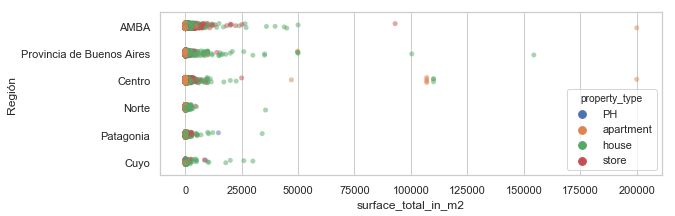

In [126]:
#m2_total
fig, ax = plt.subplots(figsize = (9, 3))
sns.stripplot(x="surface_total_in_m2", y="Región", hue= "property_type", data= data, alpha=0.5);

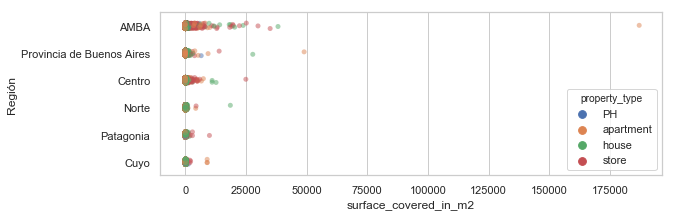

In [127]:
#m2_covered
fig, ax = plt.subplots(figsize = (9, 3))
sns.stripplot(x="surface_covered_in_m2", y="Región", hue= "property_type", data= data, alpha=0.5);

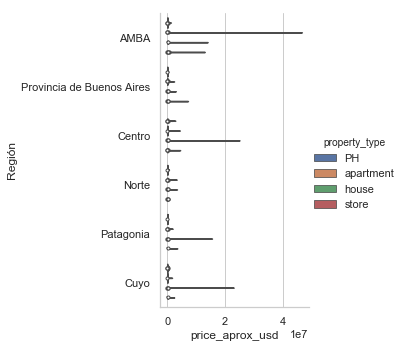

In [128]:
sns.catplot(x="price_aprox_usd", y="Región", hue="property_type",
            kind="violin", bw=.15, cut=0,
            data=data);

--------------------------Aca va lo de Fede ----------------------------------------- mas lo que agregue fede

# Algunas relaciones entre variables

In [85]:
data_prueba = data.loc[:,['state_name','property_type','surface_total_in_m2','surface_covered_in_m2','price_aprox_usd','description','title']]

In [86]:
data_prueba.state_name.value_counts()

Capital Federal                 32316
Bs.As. G.B.A. Zona Norte        25560
Bs.As. G.B.A. Zona Sur          13952
Córdoba                         12069
Santa Fe                        10172
Buenos Aires Costa Atlántica    10006
Bs.As. G.B.A. Zona Oeste         9322
Buenos Aires Interior            2291
Río Negro                         808
Neuquén                           733
Mendoza                           681
Tucumán                           674
Corrientes                        583
Misiones                          464
Entre Ríos                        369
Salta                             278
Chubut                            259
San Luis                          252
La Pampa                          157
Formosa                            65
Chaco                              57
San Juan                           40
Tierra Del Fuego                   31
Catamarca                          27
Jujuy                              26
Santa Cruz                         20
Santiago Del

## Capital Federal

In [88]:
mascara_cf = data_prueba.state_name == 'Capital Federal'
data_prov_cf = data_prueba.loc[mascara_cf,:]
data_prov_cf.corr()

,surface_total_in_m2,surface_covered_in_m2,price_aprox_usd
surface_total_in_m2,1.000000,0.872890,0.678194
surface_covered_in_m2,0.872890,1.000000,0.087913
price_aprox_usd,0.678194,0.087913,1.000000


En el siguiente gráfico, evaluamos la correlación entre la superficie cubierta, total y el precio en dólares.
A priori y sin hacer ningún tipo de limpieza, el signo de la correlación se condice con lo que uno esperaría: las superficies están estrechamente relacionadas entre sí de manera directa (a medida que aumenta la superficie cubierta vemos un incremento en la superficie total), y a su vez cada una de las superficies tiene una correlación positiva con el precio en dólares (a mayor m2 de superficie tanto cubierta como total, vemos un mayor precio).

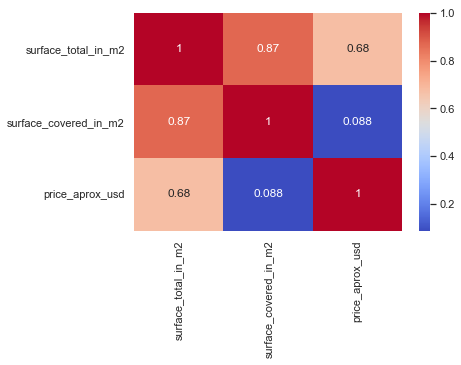

In [91]:
sns.heatmap(data_prov_cf.corr(),annot=True,cmap='coolwarm')

Como habíamos visto, existen en CABA algunos valores outliers que no tienen sentido y que intentaremos solucionar en la próxima notebook.

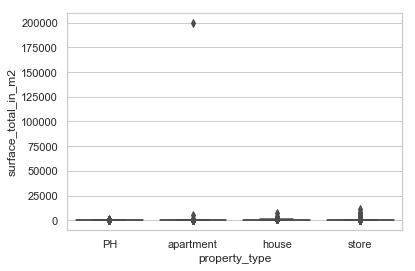

In [92]:
sns.boxplot(x='property_type',y="surface_total_in_m2",data=data_prov_cf)

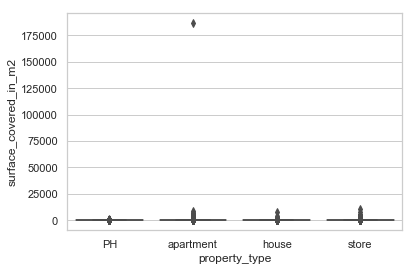

In [93]:
sns.boxplot(x='property_type',y="surface_covered_in_m2",data=data_prov_cf)

## Buenos Aires Zona Norte

In [95]:
mascara_ba_zn = data_prueba.state_name == 'Bs.As. G.B.A. Zona Norte'
data_prov_ba_zn = data_prueba.loc[mascara_ba_zn,:]
print(mascara_ba_zn.sum())
data_prov_ba_zn.corr()

25560


,surface_total_in_m2,surface_covered_in_m2,price_aprox_usd
surface_total_in_m2,1.000000,0.271234,0.254171
surface_covered_in_m2,0.271234,1.000000,0.370033
price_aprox_usd,0.254171,0.370033,1.000000


Acá el análisis de correlación es mucho menos alentador que en el caso de CABA. A priori, las relaciones obtenidas no tienen la fuerza que uno esperaría. No se relacionan las superficies entre sí y tampoco tienen mucho que ver con el precio.
Es evidente que debe existir una importante disparidad por tipo de propiedad, que hace que en el agregado no se pueda percibir una relación entre las variables. Esto se puede ver en el gráfico debajo, y lo estudiaremos esto más adelante.

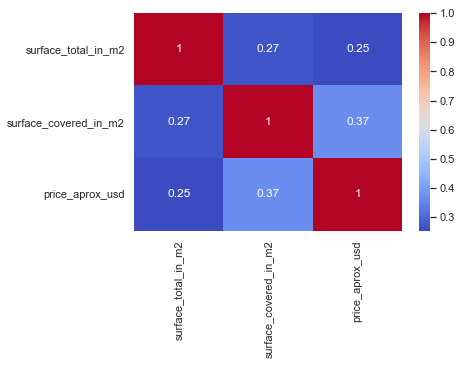

In [96]:
sns.heatmap(data_prov_ba_zn.corr(),annot=True,cmap='coolwarm')

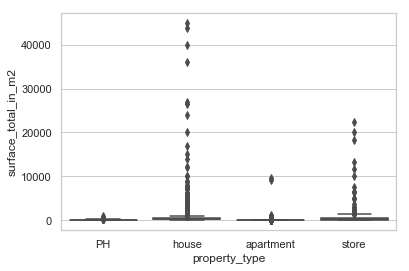

In [97]:
sns.boxplot(x='property_type',y="surface_total_in_m2",data=data_prov_ba_zn)

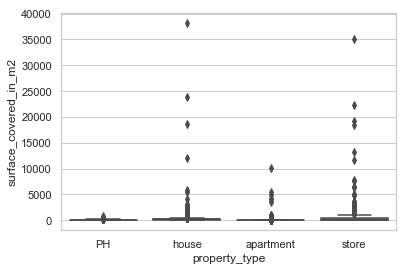

In [98]:
sns.boxplot(x='property_type',y="surface_covered_in_m2",data=data_prov_ba_zn)

## Buenos Aires Zona Sur

In [100]:
mascara_ba_zs = data_prueba.state_name == 'Bs.As. G.B.A. Zona Sur'
data_prov_ba_zs = data_prueba.loc[mascara_ba_zs,:]
print(mascara_ba_zs.sum())
data_prov_ba_zs.corr()

13952


,surface_total_in_m2,surface_covered_in_m2,price_aprox_usd
surface_total_in_m2,1.000000,0.870430,0.464581
surface_covered_in_m2,0.870430,1.000000,0.517457
price_aprox_usd,0.464581,0.517457,1.000000


En este caso sí se puede ver una relación más estrecha entre superficies, pero paralelamente la correlación respecto del precio se muestra muy débil, algo que a priori no tendría que ser así.

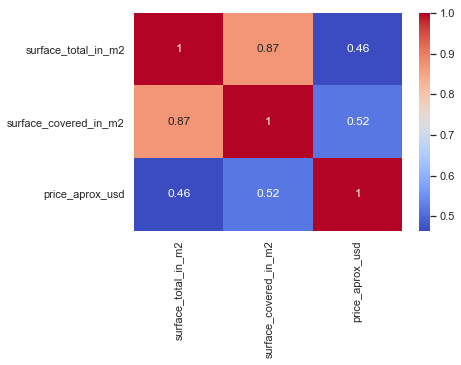

In [101]:
sns.heatmap(data_prov_ba_zs.corr(),annot=True,cmap='coolwarm')

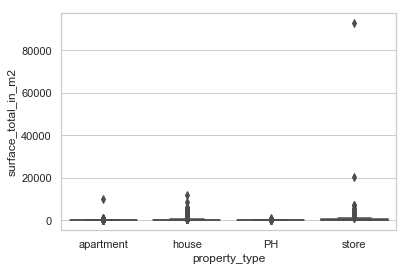

In [102]:
sns.boxplot(x='property_type',y="surface_total_in_m2",data=data_prov_ba_zs)

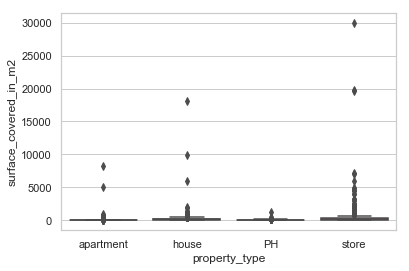

In [103]:
sns.boxplot(x='property_type',y="surface_covered_in_m2",data=data_prov_ba_zs)

## Córdoba

In [104]:
mascara_cdb = data_prueba.state_name == 'Córdoba'
data_prov_cdb = data_prueba.loc[mascara_cdb,:]
print(mascara_cdb.sum())
data_prov_cdb.corr()

12069


,surface_total_in_m2,surface_covered_in_m2,price_aprox_usd
surface_total_in_m2,1.000000,0.111914,0.246686
surface_covered_in_m2,0.111914,1.000000,0.166807
price_aprox_usd,0.246686,0.166807,1.000000


Tampoco vemos relaciones interesantes para destacar en esta geografía.

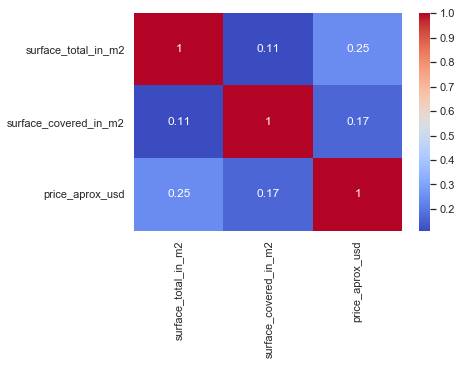

In [105]:
sns.heatmap(data_prov_cdb.corr(),annot=True,cmap='coolwarm')

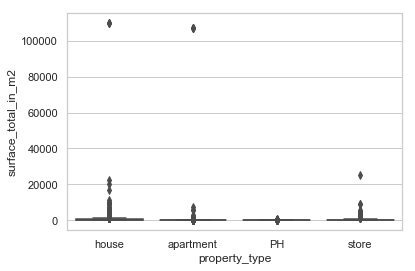

In [106]:
sns.boxplot(x='property_type',y="surface_total_in_m2",data=data_prov_cdb)

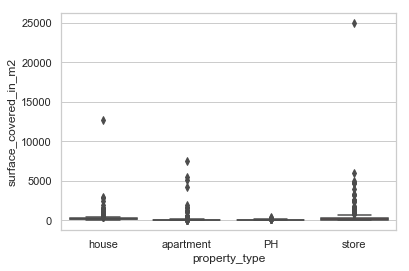

In [107]:
sns.boxplot(x='property_type',y="surface_covered_in_m2",data=data_prov_cdb)

## Santa Fe

In [108]:
mascara_sf = data_prueba.state_name == 'Santa Fe'
data_prov_sf = data_prueba.loc[mascara_sf,:]
print(mascara_sf.sum())
data_prov_sf.corr()

10172


,surface_total_in_m2,surface_covered_in_m2,price_aprox_usd
surface_total_in_m2,1.000000,0.051471,0.005807
surface_covered_in_m2,0.051471,1.000000,0.059020
price_aprox_usd,0.005807,0.059020,1.000000


Este caso llama la atención. La ausencia de relación no tiene mucho sentido si no evaluamos más en profundidad la cantidad de casos que hay en esta provincia y algunos pormenores que puedan darnos algún indicio de por qué está ocurriendo esto.

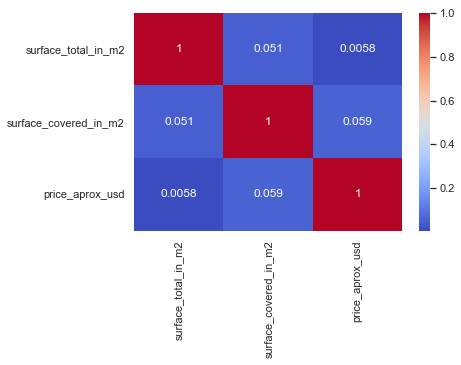

In [110]:
sns.heatmap(data_prov_sf.corr(),annot=True,cmap='coolwarm')

AxesSubplot(0.125,0.125;0.775x0.755)


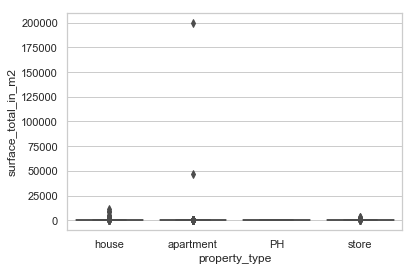

In [111]:
print(sns.boxplot(x='property_type',y="surface_total_in_m2",data=data_prov_sf))

AxesSubplot(0.125,0.125;0.775x0.755)


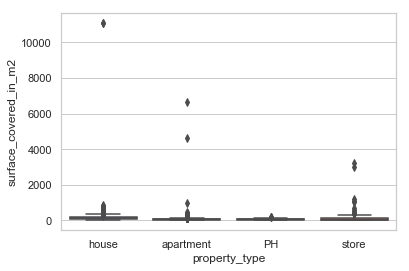

In [112]:
print(sns.boxplot(x='property_type',y="surface_covered_in_m2",data=data_prov_sf))

## Buenos Aires Costa Atlántica

In [113]:
mascara_ba_ca = data_prueba.state_name == 'Buenos Aires Costa Atlántica'
data_prov_bs_ca = data_prueba.loc[mascara_sf,:]
print(mascara_ba_ca.sum())
data_prov_bs_ca.corr()

10006


,surface_total_in_m2,surface_covered_in_m2,price_aprox_usd
surface_total_in_m2,1.000000,0.051471,0.005807
surface_covered_in_m2,0.051471,1.000000,0.059020
price_aprox_usd,0.005807,0.059020,1.000000


Mismas conclusiones que para Santa Fe.

AxesSubplot(0.125,0.125;0.62x0.755)


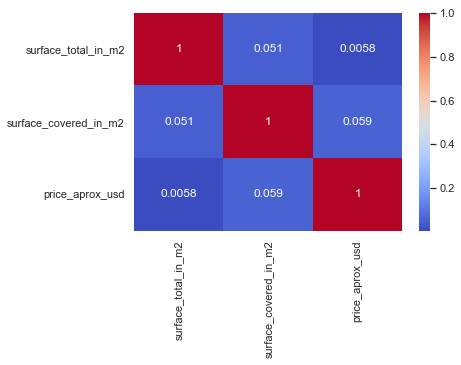

In [114]:
print(sns.heatmap(data_prov_bs_ca.corr(),annot=True,cmap='coolwarm'))

AxesSubplot(0.125,0.125;0.775x0.755)


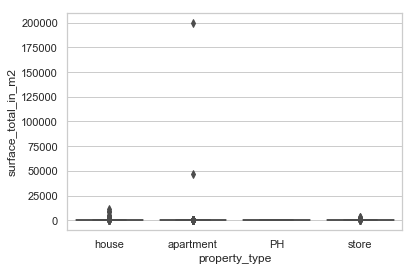

In [115]:
print(sns.boxplot(x='property_type',y="surface_total_in_m2",data=data_prov_bs_ca))

AxesSubplot(0.125,0.125;0.775x0.755)


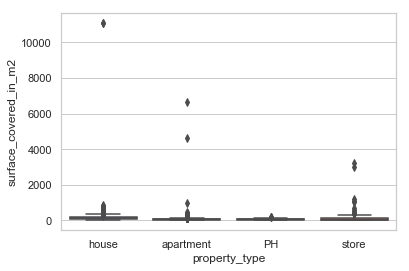

In [116]:
print(sns.boxplot(x='property_type',y="surface_covered_in_m2",data=data_prov_bs_ca))